# **Cardio Good Fitness Assignment 1**

This Notebook presents some preliminary and exploratory Data Analysis on the CardioGoodFitness dataset. The following functions are used to explore the dataset and extract basic observations about the data.

At the end of this exercise, I'll generate a set of insights and recommendations that will help the company in targeting new customers

This Exploratory Data Analysis will be divided into 3 sections:
1. Univariate analysis
2. Bivariate analysis
3. Insights and recommendations

# Introduction

The following command installs the latest version of pandas-profiling, a python library used to do basic exploratory data analysis (EDA). 

**Note**: the code before the pip command makes certain that I am running the pip version associated with the current Python kernel.

In [ ]:
import sys
!{sys.executable} -m pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=2f8a1e7051c146365e1ae043d2de05c1271a0b2438faf6e89e35cbf5b11f7b95
  Stored in directory: /tmp/pip-ephem-wheel-cache-k5c1kzol/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
!pip install pandas-profiling

Once the package pandas-profiling is installed, I import the numpy, pandas, matplotlib and seaborn packages, as well as the object ProfileReport from the pandas_profiling package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

The following command reads the csv file containing our data and assigns it to the variable object data. the head method is used to show part of the data.

In [ ]:
data = pd.read_csv("CardioGoodFitness.csv")
data.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

The following command will give brief info about the dataset, including dataframe size and structure

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# **1. Exploratory Data Analysis (EDA)**

## **Dataset Profile**

The following command will generate a report with the function ProfileReport from the pandas_profiling package and assigned to the object 'profile'

In [ ]:
profile = ProfileReport(data, title="Cardio Good Fitness Profiling Report")

The following code uses the method to_widgets() on the object 'profile' to create some HTML reports of the variables. 

The **Overview** tab gives a summary of the dataset with number of observations and variables

The **Variables** tab gives an univariate analysis of each variable. 

1.   If the variable is categorical, such as Product, Gender, MaritalStatus and fitness, a descriptive statistics table as well as a horizontal bar plot are displayed to show the frequency each category.
2.   If the variable is continuous, such as Age, Education, Usage, Income, Miles, a descriptive statistics table as well aa histogram are displayed to show the distribution.

The **Correlations** tab shows a correlation heatmap of the continuous variables.

The **Missing values** tab shows a bar plot for each variable and the freqency of missing values. There are no missing values in this dataset.

The **Sample** tab represents the head() and tail() of the dataset. (first and last 10 rows)

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:433: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## **Visualizing ALL Numerical Variables at Once**

The first line of the following code create a list of numerical variables. the variable 'Fitness' can be used as categorical oir continous variables in regression for example, even if strictly speaking, it is an ordinal variable.

The second line of this code creates a 2*3 plot matrix of the numerical variables with the 'hist' method from the pandas package

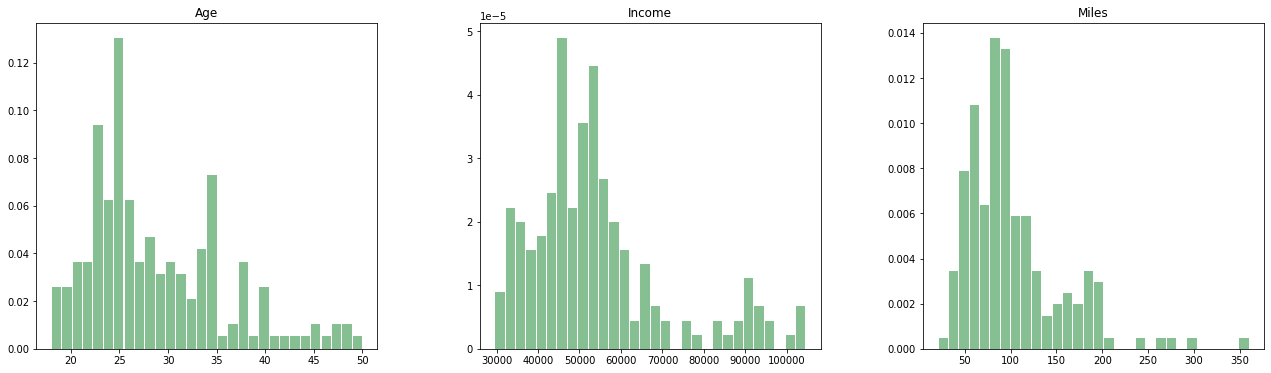

In [ ]:
numericals = ['Age', 'Income', 'Miles']
data[numericals].hist(bins=30, grid=False, figsize=(22, 6), layout=(1,3), color='#86bf91', zorder=2, rwidth=0.9, density=True);

## **Continuous Variables - Outliers**

The following shows boxplots of the dataset continuous variables with median, IQR and outliers.

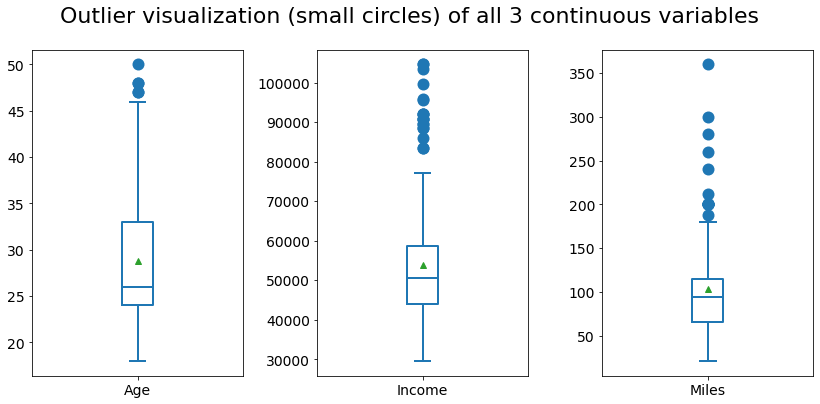

In [ ]:
boxprops = dict(linestyle='-', linewidth=2, color='#1F77B4')
medianprops = dict(linestyle='-', linewidth=2, color='#1F77B4')
whiskerprops = dict(linestyle='-', linewidth=2, color='#1F77B4')
capprops = dict(linestyle='-', linewidth=2, color='#1F77B4')
flierprops = dict(marker='o', markerfacecolor='#1F77B4', markersize=12, markeredgecolor='none')

data[numericals].plot(kind='box', 
                      subplots = True, 
                      figsize = (14,6), 
                      layout = (1,3),
                      fontsize = 14,
                      boxprops=boxprops,
                      medianprops=medianprops,
                      whiskerprops=whiskerprops,
                      capprops=capprops,
                      flierprops=flierprops,
                      showmeans=True,
                      legend=True)

plt.subplots_adjust(wspace=0.35)
plt.suptitle("Outlier visualization (small circles) of all 3 continuous variables", fontsize=22)
plt.show();

**Observation from boxplots**: teh variables income and miles have lots of outliers, here as blue circles. If statistical modeling were to be plied such as multiple regression with the 'Miles' variable as the outcome variables, outliers need to be fixed with some imputation or deletion


## **Visualizing ALL Categorical Variables at Once**

The following code creates a list of categorical variables called 'categoricals', create subplots for each categorical variable and loop through each of them to create the actual plot with pandas plot function, with options for colors and xticks rotation

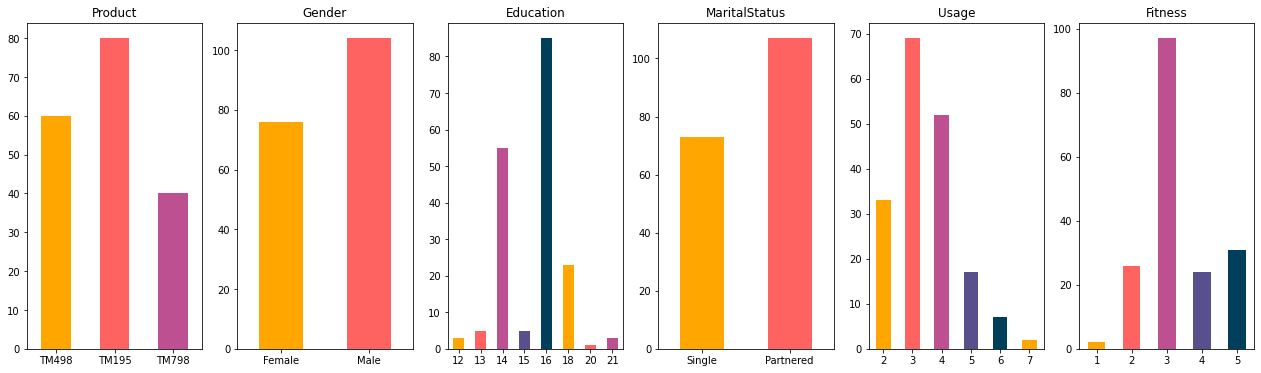

In [ ]:
categoricals = ["Product", "Gender", "Education", "MaritalStatus", "Usage", "Fitness"]
fig, ax = plt.subplots(1, len(categoricals), figsize=(22,6))
for i, categorical in enumerate(data[categoricals]):
    data[categorical].value_counts(sort=False).plot(kind='bar', ax=ax[i],  color=['#ffa600', '#ff6361', '#bc5090', '#58508d', '#003f5c'], rot=0).set_title(categorical)
fig.show();

# **2. Bivariate Analysis and Observations**

This section will include informative visualizations to answer some questions about the dataset.

## **Self-rated Fitness Scores and Gender**

Mosaic plots allow to visualize multivariate categorical data in an informative way. In this plot, I'm trying to look at how the elf rated fitness score of the customer relates to gender.

I first import the mosaic class from statsmodel and then draw a mosaic plot with color properties: red for Male and blue for Female

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


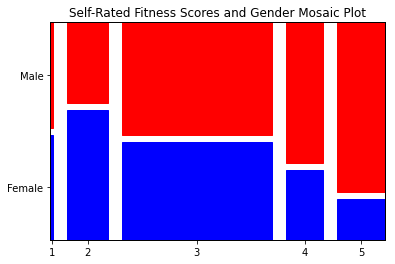

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

props = lambda key: {'color': 'r' if 'Male' in key else 'b'}
mosaic(data.sort_values('Fitness'), 
       ['Fitness', 'Gender'], 
       gap=0.05, 
       title='Self-Rated Fitness Scores and Gender Mosaic Plot', 
       properties=props, 
       labelizer=lambda k: '')
fig.tight_layout()
fig.show();



**Observation from Mosaic Plot:** The following plt show that about 50% of customers, males and females equaly, show a self rated fitness score of 3, meaning these customers rate themselves as quite fit. From those customer who rate themselves very fit (5), most are men. Looking at the psychology, womentend to be harder on themselves when it comes to fitness, so we need to keep this inmind.


## **Correlations Between Continous Variables**

The following code first finds the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded and any non-numeric data type columns (MaritalStatus) in the dataframe it is ignored.

A correlation heatmap is then created with the seabornfunction 'heatmap' with some added options to add correlation values.

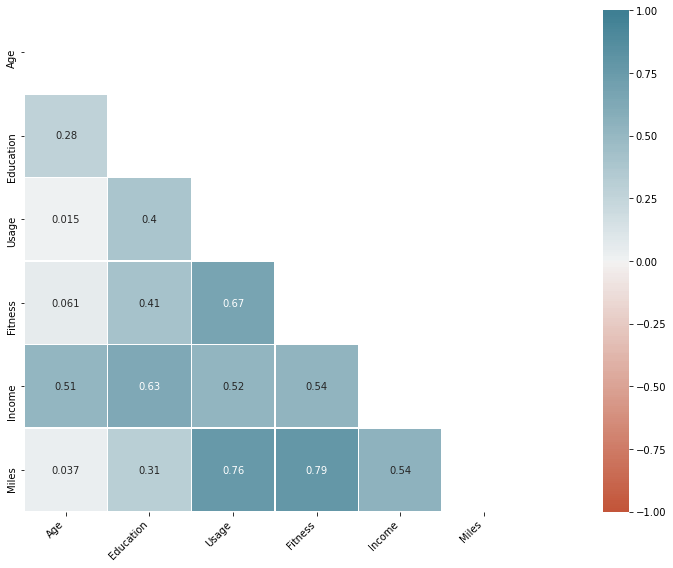

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(1, 1, figsize=(22,8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
fig.tight_layout()
fig.show();

**Observation from Correlation Matrix Plot:** From a statistical pointf view, a correlation of 0.7 and above is accepable, good or very good. From this correlation ot, we canee that the variable "Miles" has a fairly strong correlation with Usage (0.76) and strong correlation with the variable "Fitness". We can concludeorm this correlation that the higher a customer sef-rate, the morehe's running his/her miles.

On the other hand, the variable "Age" or no correlation with "Usage" (0.02), "Fitness" (0.06) and "Miles" (0.04), while showing a medium correlation with "Income" (r=0.51)

## **Relationship Between Age, Miles, Gender and Marital Status**

The following code creates a scatterplot to look at the relationship between Age, Miles, Gender and Marital Status

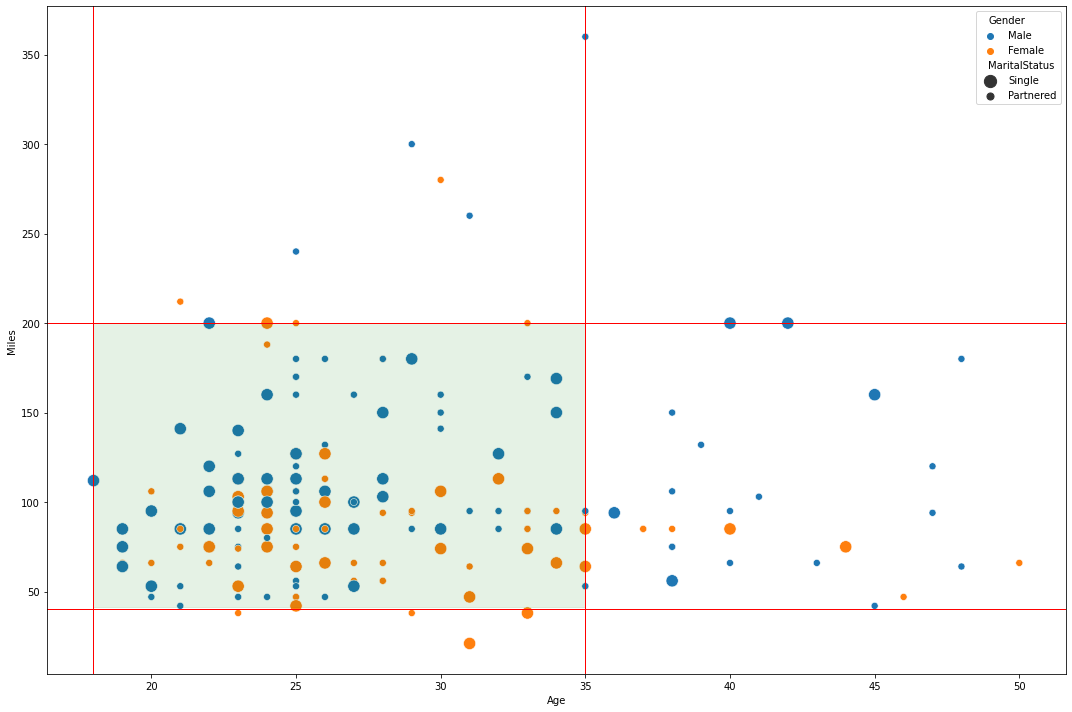

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(x="Age", y="Miles", data=data, hue="Gender", size="MaritalStatus", sizes=(50, 150), ax=ax)
ax.axhline(y=40, color='r', linewidth=1)  
ax.axvline(x=18, color='r', linewidth=1)
ax.axhline(y=200, color='r', linewidth=1)  
ax.axvline(x=35, color='r', linewidth=1)
ax.axvspan(xmin=18, xmax=35, ymin=0.1, ymax=0.525, color="green", alpha=0.1)
fig.tight_layout()
fig.show();

**Observation from Scatterplot:** this scatterplot shows "spatial" correlation (instead of a fixed number like above) between Age, les, Gender and Marital Status. We can see that the bulk of customers are between 18 and 35, runtween 45 and 200 miles, with females runningmostlup to 120 miles. the sizew of the dots with the green area shows lots of customers are single.

## **Relationship Between Products and Dataset Variables**

In this section, the data has been grouped by products to look at education, usage, fitness scores, income and miles by product. Then simple scatterplot is drawn.

In [ ]:
products = data.groupby('Product')[['Education', 'Usage', 'Fitness', 'Income', 'Miles']].mean().round(0).reset_index()
products

Product  Education  Usage  Fitness   Income  Miles
0   TM195       15.0    3.0      3.0  46418.0   83.0
1   TM498       15.0    3.0      3.0  48974.0   88.0
2   TM798       17.0    5.0      5.0  75442.0  167.0

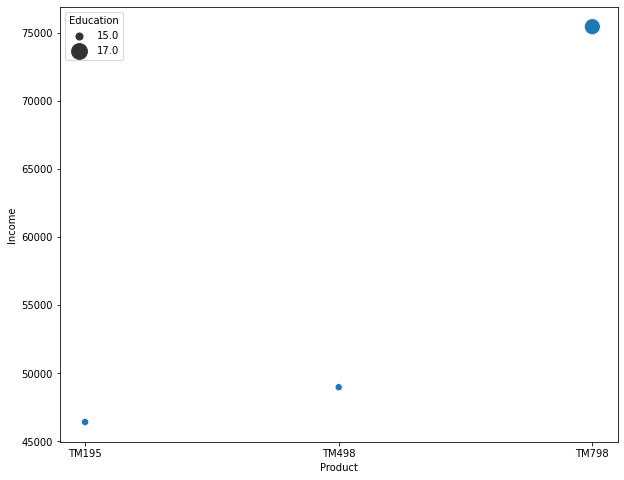

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
fig = sns.scatterplot(x="Product", y="Income", data=products, size="Education", sizes=(50, 250))

**Observation from simple scatterplot:** from the scatterpolot, the Product TM798 seems to attract a lot more affluent and educated people. We can assume that TM798 is the latest model therefore might be more expensive. And we know from demographics psychology that more educated people seem to have a higher salary.

## **Relationship Between Products and Income**

The following code displays a simple scatterplot to look at income by Model number of treadmill used by customer.

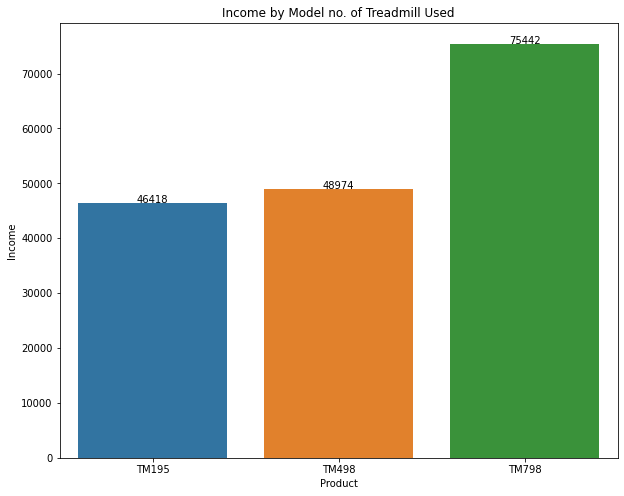

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

g = sns.barplot(x="Product", y="Income", data=products)

for index, row in products.iterrows():
    g.text(row.name,row.Income, int(row.Income), color='black', ha="center")

plt.title("Income by Model no. of Treadmill Used")
fig.show()

**Observation from Barplot:** this barplot shows that the product TM798 is bought by more affluent people. TM 798 might be the latest treadmill model and might be more expensive.

## **Relationship Between Marital Status and Products Used**

In this section, the data has been grouped by products **as well as** marital status, to look at age, education, usage, fitness scores, income and miles by product and marital status. Then categorical barplot is drawnusing the function 'catplot' from seaborn.

In [ ]:
mstatus = data.groupby(['Product','MaritalStatus']).mean().round(0).reset_index()
mstatus

Product MaritalStatus   Age  Education  Usage  Fitness   Income  Miles
0   TM195     Partnered  30.0       15.0    3.0      3.0  47849.0   77.0
1   TM195        Single  27.0       15.0    3.0      3.0  44272.0   91.0
2   TM498     Partnered  30.0       15.0    3.0      3.0  49523.0   90.0
3   TM498        Single  27.0       15.0    3.0      3.0  48150.0   85.0
4   TM798     Partnered  30.0       17.0    5.0      5.0  82047.0  183.0
5   TM798        Single  28.0       17.0    5.0      5.0  66505.0  145.0

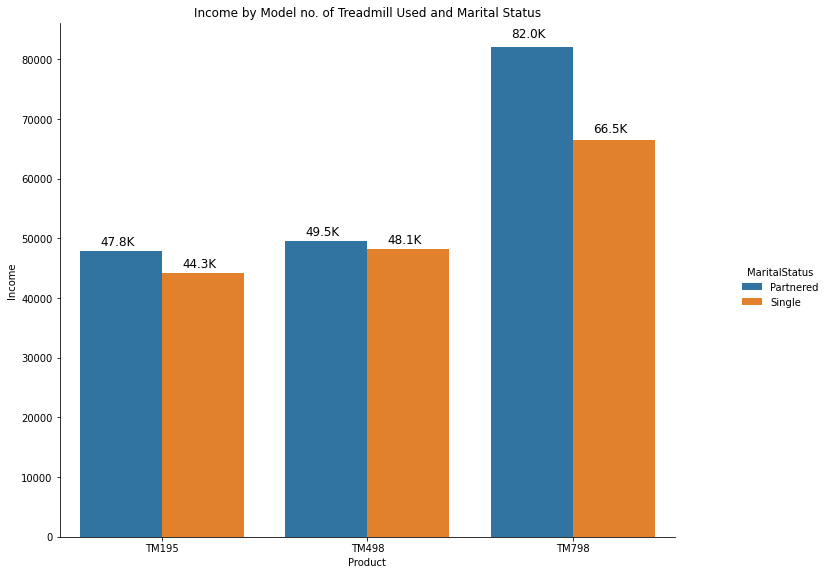

In [ ]:
g = sns.catplot(x="Product", y="Income", hue="MaritalStatus", data=mstatus, height=5, aspect=1.2, kind="bar")

plt.title("Income by Model no. of Treadmill Used and Marital Status")

g.fig.set_size_inches(12,8)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   # Used to format in K 
            color='black', 
            rotation='horizontal', 
            size='large')
    

plt.show(g)

**Observation from Categorical Plot:** Another important piece of information can be gleaned from this bar plot. The TM798 is purchased by e partnerd than single.

# **3. Recommendations**

In the following section, I am going provide some recommandation to the owner Cardio Good Fitness club based on the data I explored.

- The marketing department can create customer segmentation and target more educated and affluent customers to buy the latest treadmill model TM798.
- Further segmentation can be done to target partnered people with $65K a year to buy the TM798
- Since the bulk of the customers are from 18 to 35, and run between 50 and 200 miles, create target advertising for these people.
- The highest correlation is between Fitness and Miles, so I would advise to target people with offers for those who rate themselves 3 and above, because they run more (higher Miles), therefore more motivated to exercise, therefore more prone to buy fitness equipment in general

# Conclusion

In this first assignment, I explore the Cardio Good Fitness dataset by doing univariate and bivariate analyses. I then recommended solutions to potential onwer of the fitness store.